# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

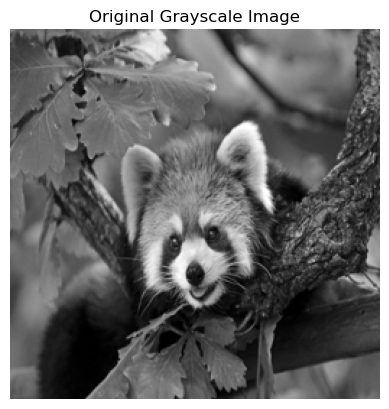

In [21]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

image_path = 'C:/Users/wangy/Downloads/homework-practice-03-svd/panda.jpg'

img = Image.open(image_path)
img_gray = img.convert('L')  # 转换为灰度图像
img_gray = img_gray.resize((256, 256))  # 可以调整图像大小

# 显示原始灰度图像
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()
# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

In [53]:
# 将 PIL 图像转换为 NumPy 数组
x = np.array(img_gray, dtype=np.float32)

# 对灰度图像应用 SVD 分解
compressed_images = {}
compressed_sizes = {}

for k in [1, 2, 10, 30, 100,200]:
    U, S, Vt = np.linalg.svd(x, full_matrices=False)
    
    # 构建对角矩阵 S_k
    S_k = np.diag(S[:k])
    
    # 重构压缩后的图像
    compressed_image = U[:, :k] @ S_k @ Vt[:k, :]

    # 确保数值范围在 [0, 255] 内
    compressed_image = np.clip(compressed_image, 0, 255)
    
    # 转换为整数类型
    compressed_image = compressed_image.astype(np.uint8)
    
    compressed_images[k] = compressed_image
    # 计算压缩后的图像存储大小
    compressed_sizes[k] = compressed_image.nbytes

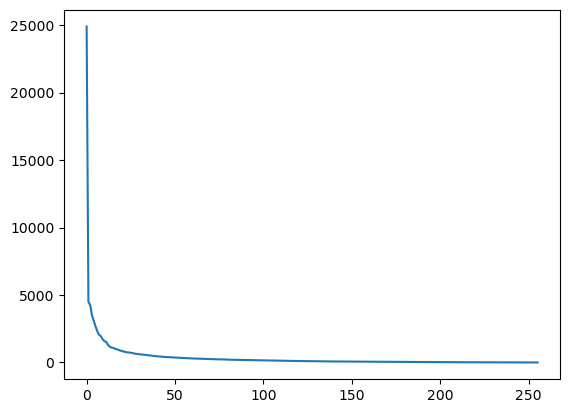

In [19]:
U, S, Vt = np.linalg.svd(x[:, :, channel], full_matrices=False)
plt.plot(S)

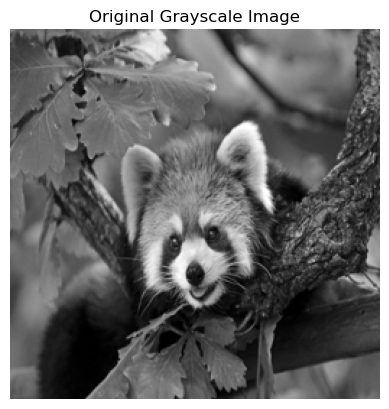

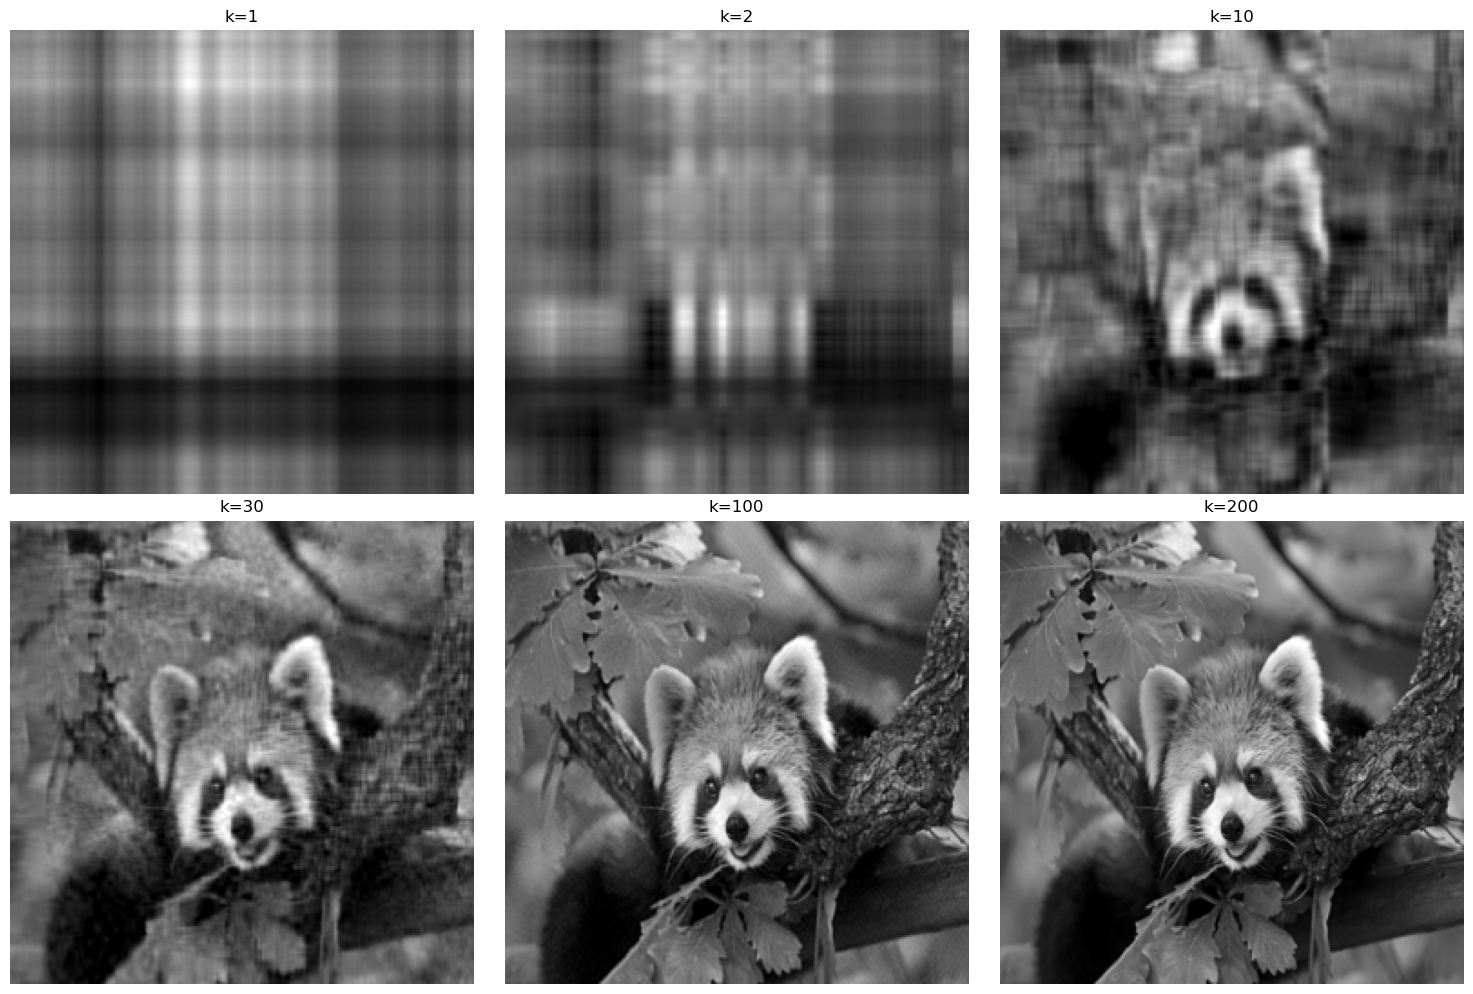

In [55]:
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()
# 显示压缩后的图像
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, k in enumerate([1, 2, 10, 30, 100,200]):
    axes[i].imshow(compressed_images[k].astype(np.uint8), cmap='gray')
    axes[i].set_title(f'k={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [57]:
#计算原始图像的存储大小
original_size = x.nbytes
print(f"Original size: {original_size} bytes")

# 打印每个压缩后的图像存储大小
for k, compressed_size in compressed_sizes.items():
    print(f"Compressed size (k={k}): {compressed_size} bytes")

# 打印每个压缩后的图像形状
for k, compressed_image in compressed_images.items():
    print(f"Compressed shape (k={k}): {compressed_image.shape}")


Original size: 262144 bytes
Compressed size (k=1): 65536 bytes
Compressed size (k=2): 65536 bytes
Compressed size (k=10): 65536 bytes
Compressed size (k=30): 65536 bytes
Compressed size (k=100): 65536 bytes
Compressed size (k=200): 65536 bytes
Compressed shape (k=1): (256, 256)
Compressed shape (k=2): (256, 256)
Compressed shape (k=10): (256, 256)
Compressed shape (k=30): (256, 256)
Compressed shape (k=100): (256, 256)
Compressed shape (k=200): (256, 256)


In [59]:
for k, compressed_image in compressed_images.items():
    Image.fromarray(compressed_image.astype(np.uint8)).save(f'compressed_k{k}_grayscale.png')

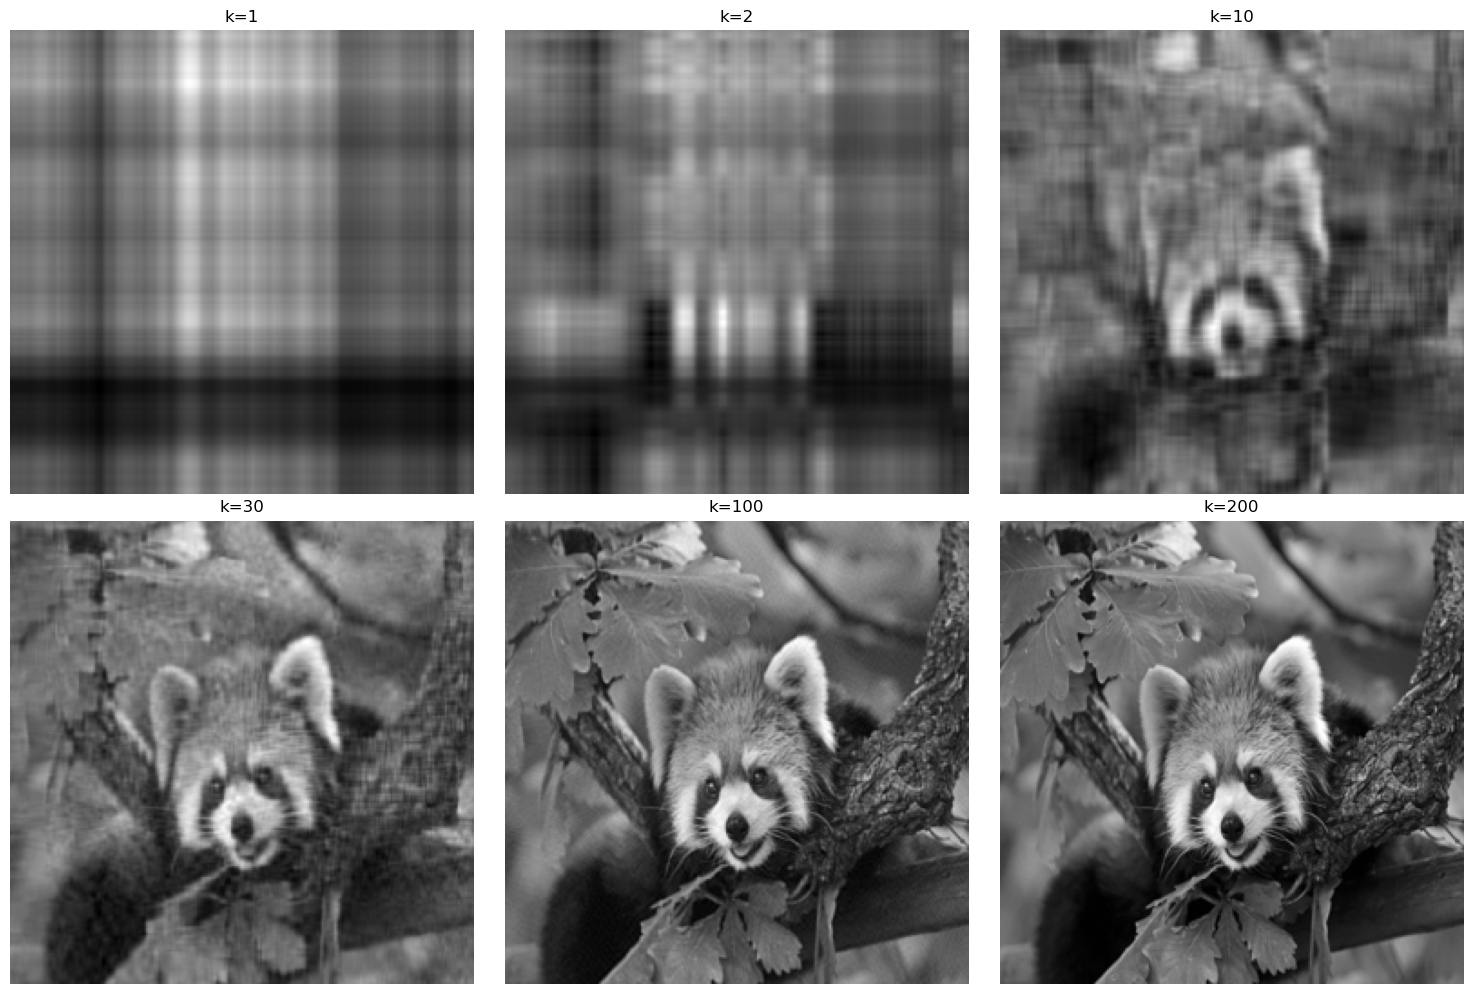

Original size: 262144 bytes
Compressed size (k=1): 2052 bytes
Compressed size (k=2): 4104 bytes
Compressed size (k=10): 20520 bytes
Compressed size (k=30): 61560 bytes
Compressed size (k=100): 205200 bytes
Compressed size (k=200): 410400 bytes
Compressed shape (k=1): U.shape=(256, 1), S.shape=(1,), Vt.shape=(1, 256)
Compressed shape (k=2): U.shape=(256, 2), S.shape=(2,), Vt.shape=(2, 256)
Compressed shape (k=10): U.shape=(256, 10), S.shape=(10,), Vt.shape=(10, 256)
Compressed shape (k=30): U.shape=(256, 30), S.shape=(30,), Vt.shape=(30, 256)
Compressed shape (k=100): U.shape=(256, 100), S.shape=(100,), Vt.shape=(100, 256)
Compressed shape (k=200): U.shape=(256, 200), S.shape=(200,), Vt.shape=(200, 256)


In [67]:
# 对灰度图像应用 SVD 分解
compressed_svd_components = {}
compressed_sizes = {}

for k in [1, 2, 10, 30, 100, 200]:
    U, S, Vt = np.linalg.svd(x, full_matrices=False)
    
    # 构建对角矩阵 S_k
    S_k = np.diag(S[:k])
    
    # 重构压缩后的图像
    compressed_image = U[:, :k] @ S_k @ Vt[:k, :]
    
    # 确保数值范围在 [0, 255] 内
    compressed_image = np.clip(compressed_image, 0, 255)
    
    # 转换为整数类型
    compressed_image = compressed_image.astype(np.uint8)
    
    # 增加一个维度，使形状变为 (256, 256, 1)
    compressed_image_3d = compressed_image[:,:,None]
    
    # 存储压缩后的 SVD 分量
    compressed_svd_components[k] = {
        'U': U[:, :k],
        'S': S[:k],
        'Vt': Vt[:k, :]
    }
    
    # 计算压缩后的 SVD 分量存储大小
    compressed_size = U[:, :k].nbytes + S[:k].nbytes + Vt[:k, :].nbytes
    compressed_sizes[k] = compressed_size

# 显示压缩后的图像
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, k in enumerate([1, 2, 10, 30, 100, 200]):
    compressed_image = compressed_svd_components[k]['U'] @ np.diag(compressed_svd_components[k]['S']) @ compressed_svd_components[k]['Vt']
    compressed_image_3d = compressed_image[:,:,None]
    axes[i].imshow(compressed_image_3d.squeeze(), cmap='gray')
    axes[i].set_title(f'k={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 计算原始图像的存储大小
original_size = x.nbytes
print(f"Original size: {original_size} bytes")

# 打印每个压缩后的 SVD 分量存储大小
for k, compressed_size in compressed_sizes.items():
    print(f"Compressed size (k={k}): {compressed_size} bytes")

# 打印每个压缩后的图像形状
for k, compressed_image in compressed_svd_components.items():
    print(f"Compressed shape (k={k}): U.shape={compressed_image['U'].shape}, S.shape={compressed_image['S'].shape}, Vt.shape={compressed_image['Vt'].shape}")

# 保存压缩后的 SVD 分量
for k, components in compressed_svd_components.items():
    np.save(f'compressed_k{k}_U.npy', components['U'])
    np.save(f'compressed_k{k}_S.npy', components['S'])
    np.save(f'compressed_k{k}_Vt.npy', components['Vt'])

# 保存压缩后的图像
for k, compressed_image in compressed_svd_components.items():
    # 重构压缩后的图像
    compressed_image_2d = compressed_image['U'] @ np.diag(compressed_image['S']) @ compressed_image['Vt']
    
    # 确保数值范围在 [0, 255] 内
    compressed_image_2d = np.clip(compressed_image_2d, 0, 255)
    
    # 转换为整数类型
    compressed_image_2d = compressed_image_2d.astype(np.uint8)
    
    # 增加一个维度，使形状变为 (256, 256, 1)
    compressed_image_3d = compressed_image_2d[:,:,None]
    
    # 保存图像
    Image.fromarray(compressed_image_3d.squeeze()).save(f'compressed_k{k}_grayscale.png')